# K mean:

refs: 

* https://realpython.com/k-means-clustering-python/
* http://madhugnadig.com/articles/machine-learning/2017/03/04/implementing-k-means-clustering-from-scratch-in-python.html#:~:text=K%20Means%20Clustering%20is%20one,cluster%20analysis%20in%20data%20mining.&text=The%20K%20Means%20algorithm%20is,to%20have%20in%20the%20closet.
* https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/#:~:text=Below%20is%20a%20function%20named%20euclidean_distance()%20that%20implements%20this%20in%20Python.&text=We%20can%20test%20this%20distance,needed%20for%20the%20KNN%20algorithm.

GOALS:
    
1. WHat is K means 
1. Elbow method
1. Comomn appications exmaples
1. Code implemenattion


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

from sys import maxsize 

maxint = maxsize

#sns.set_style("white")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Simulated data

,x,y,label
0,-0.727786,3.510374,0
1,0.913440,3.155754,0
2,1.007199,4.132267,0
3,-0.301637,5.135782,0
4,0.491915,3.080579,0


,x,y,label
195,4.361546,0.120045,1
196,4.997881,0.877376,1
197,4.795379,-0.509304,1
198,4.755147,-0.410438,1
199,3.130276,-0.536280,1


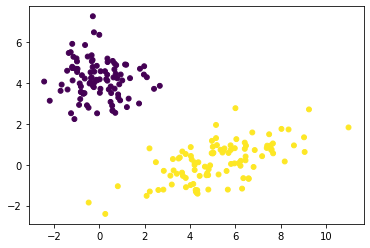

In [4]:
### Setup
# set random seed
rand.seed(42)

# 2 clusters
# not that both covariance matrices are diagonal
mu1 = [0, 4]
sig1 = [ [1, 0], [0, 1] ]

mu2 = [5, 0]
sig2 = [ [4, 1.3], [1.3, 1] ]

# generate samples
x1, y1 = np.random.multivariate_normal(mu1, sig1, 100).T
x2, y2 = np.random.multivariate_normal(mu2, sig2, 100).T

xs = np.concatenate((x1, x2))
ys = np.concatenate((y1, y2))
labels = ([0] * 100) + ([1] * 100)

data = {'x': xs, 'y': ys, 'label': labels}
df = pd.DataFrame(data=data)

# inspect the data
df.head()
df.tail()

fig = plt.figure()
plt.scatter(data['x'], data['y'], 24, c=data['label'])


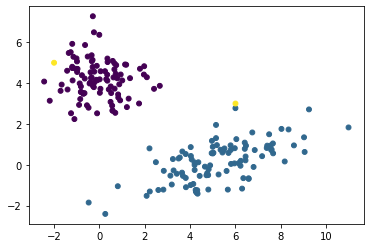

In [5]:
initial_guess = pd.DataFrame({'x': [-2.0, 6.0], 'y': [5.0,3.0], 'label': [3,3]})


df2 = pd.concat([df, initial_guess],ignore_index=True)

fig = plt.figure()
plt.scatter(df2['x'], df2['y'], 24, c=df2['label'])

In [6]:
## K mean is very simple to EM in GMM algorithm
class Kmean():

    def __init__(self, initial_guess, number_iter = 15):
        
        
        self.n_iter = number_iter # max #iterations
        
        self.centroids = initial_guess
        
        self.n_centroids = len(self.centroids)
        
        
    def _expectation(self, data: pd.DataFrame):
        # update labels in the data 
        
        for i,  row in data.iterrows():
        
            x = row['x']
            y = row['y']
            
            min_distance = float("inf")
            for k in range(self.n_centroids):
                                
                cx, cy = self.centroids[k]

                # eucledian distance
                d2 = pow(x-cx,2) + pow(y-cy,2)
                
                if d2 < min_distance:
                    
                    min_distance = d2
                    min_label = k
                    
            data['label'][i] = min_label
            
    def _maximization(self, data: pd.DataFrame):
        # update centroids 
        
        for k in range(self.n_centroids): 
        
            df_c = data[data.label == k]
            
            mu_x = df_c.x.mean()
            mu_y = df_c.y.mean()
            
            self.centroids[k] = (mu_x, mu_y)
        
    def fit(self, X):
        
        data = X.copy()
        data['label'] = 0
        
        for it in range(self.n_iter):
            
            self._expectation(data)
            self._maximization(data)
            
        return data.label.values


In [7]:
initial_guess = [(-2.0, 5.0),(6.0,3.0)]

X = df[['x','y']].copy()

kmeans = Kmean(initial_guess)

pred = kmeans.fit(X)

In [8]:
df['pred'] = pred


df.sample(11)

,x,y,label,pred
110,4.949163,0.567058,1,1
169,5.803353,0.039442,1,1
107,4.193055,0.115172,1,1
105,5.141732,1.304396,1,1
40,0.785724,4.238746,0,0
111,0.810323,-1.053744,1,1
21,-0.869712,3.986295,0,0
175,5.254107,-0.478303,1,1
68,-0.343323,4.279948,0,0
157,9.050380,0.626244,1,1
